## 1. Load & clean data

In [ ]:
# imports libraries
import pandas as pd
import numpy as np
import re
from transformers import pipeline
from tqdm import tqdm


In [45]:
# 1. read data file
df = pd.read_excel("data/amazon_product_reviews.xlsx", sheet_name=0, engine='openpyxl')

In [ ]:
# import re

def clean_text(text):
    if isinstance(text, str):
        # Remove non-printable and control characters
        return re.sub(r'[^\x20-\x7E\u0600-\u06FF]', '', text)
    return text

# --- Clean numeric-like columns  ---
numeric_like_cols = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in numeric_like_cols:
    if col in df.columns:
        # Remove non-digit characters (keep dot)
        df[col] = df[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
        # Convert to float; invalids become NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# save cleaned data
df.to_excel("data/amazon_product_reviews_cleaned.xlsx", index=False, engine='openpyxl')

In [47]:
print("First 5 rows:")
display(df.head())

print(f"\n Shape of dataset: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n Info:")
df.info()

print("\n Missing values per column:")
print(df.isnull().sum())

print("\n Duplicates:", df.duplicated().sum())

print("\n Summary stats:")
display(df.describe())


First 5 rows:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1099.0,0.64,4.2,24269.0,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQ...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original i...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZA...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3AAQGS6HP2QUK,R1HDNOG6TO2CCA,R3PHKXYA5AFEOU","A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's sti...,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31zOsqQOAOL._SY445_SX342_QL70_FMwebp_.jpg,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braided-Cable/dp/B098NS6PVG/ref=sr_1_2?qid=1672909124&s=electronics&sr=1-2
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,1899.0,0.90,3.9,7928.0,ã€ Fast Charger& Data Syncã€‘-With built-in safety proctections and four-core copper wires promote maximum signal quality and strength and enhance charging & data transfer speed with up to 480 mb...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3X...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,Ramu Challa,Sanjay gupta","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91LX,R27OK7G99VK


 Shape of dataset: 1465 rows × 16 columns

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096585,18295.541353
std,6944.304394,10874.826864,0.216359,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


the Missing is : rating_count , so i will fill by 0 , 
If there’s no rating, that means no reviews → 0.
If there’s no rating count, that means no people rated → 0.

In [48]:
# --- Handle nulls in numeric columns by zero in : "rating", "rating_count"  ---

# For rating and rating_count -> fill with 0
numeric_like_cols = ["rating", "rating_count"]
for col in numeric_like_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)  # 0 = no reviews / no ratings



# they don't have text null: Handle nulls in text/object columns
# for col in df.select_dtypes(include='object').columns:
#     df[col] = df[col].fillna("Unknown")

# --- Save cleaned data ---
df.to_excel("data/amazon_product_reviews_cleaned.xlsx", index=False, engine='openpyxl')

print("✅ Data cleaned & null values handled successfully!")
print(df.isnull().sum())



✅ Data cleaned & null values handled successfully!
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [50]:
# Outliers
print("\nالأعمدة المرشحة لوجود Outliers (قيم متطرفة):")
numeric_cols = df.select_dtypes(include="number").columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"- {col}: {len(outliers)} outliers")


الأعمدة المرشحة لوجود Outliers (قيم متطرفة):
- discounted_price: 217 outliers
- actual_price: 213 outliers
- discount_percentage: 0 outliers
- rating: 75 outliers
- rating_count: 141 outliers


## 2. EDA (Exploratory Data Analysis)

#### 2.1 Numerical columns analysis: discounted_price, actual_price, discount_percentage, rating, rating_count.

In [59]:
# =========================================
# 4. Exploratory Data Analysis (EDA)
# =========================================

# Summary statistics
print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe())

# Top selling products (by rating_count or revenue)
df['revenue'] = df['discounted_price'] * df['rating_count']
top_sales = df.sort_values(by='revenue', ascending=False).head(10)
print(top_sales[['product_name', 'revenue', 'rating_count', 'discounted_price']])


       discounted_price   actual_price  discount_percentage       rating   rating_count
count       1465.000000    1465.000000          1465.000000  1465.000000    1465.000000
mean        3125.310874    5444.990635             0.476915     4.093788   18270.564505
std         6944.304394   10874.826864             0.216359     0.310598   42729.995315
min           39.000000      39.000000             0.000000     0.000000       0.000000
25%          325.000000     800.000000             0.320000     4.000000    1173.000000
50%          799.000000    1650.000000             0.500000     4.100000    5178.000000
75%         1999.000000    4295.000000             0.630000     4.300000   17325.000000
max        77990.000000  139900.000000             0.940000     5.000000  426973.000000
                                                                                                     product_name       revenue  rating_count  discounted_price
370                  Redmi 9 Activ (Carbon Black

#### 2.2 Categorical analysis: category

In [53]:
# Count products per category
category_counts = df['category'].value_counts()
print(category_counts.head(10))

# If categories are separated by ">"
df['main_category'] = df['category'].apply(lambda x: x.split("|")[0].strip())
main_category_counts = df['main_category'].value_counts()
print(main_category_counts)


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitch

## 3. Feature Engineering

In [ ]:
# =========================================
#  Feature Engineering
# =========================================
# Benefits for Chatbot: These features provide numerical representations of product attributes
# that a chatbot can use to filter, recommend, or answer specific queries without deep text processing
# every time. They enrich the product catalog.

df['has_discount'] = df['discount_percentage'] > 0
# Why: A simple boolean flag. Chatbots can use this to quickly answer "Are there any discounted items?"

df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))
# Why: Longer reviews might indicate more detailed feedback, either positive or negative.
#      A chatbot could prioritize showing reviews with a certain length for more context.

df['popularity'] = df['rating'] * df['rating_count']
# Why: Combines both quality (rating) and quantity of feedback (rating_count) into a single metric.
#      A product with a 5.0 rating from 1 review is less popular than a 4.5 rating from 1000 reviews.
#      Useful for "Show me popular products."

df['price_tier'] = pd.qcut(df['discounted_price'], q=4, labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'], duplicates='drop')
# Why: Categorizes products into price segments. Chatbots can answer "Show me budget laptops" or "What's in the luxury category?".
#      qcut ensures an even distribution across tiers.

df['discount_level'] = pd.cut(df['discount_percentage'], bins=[-1, 10, 25, 50, 100],
                              labels=['No/Low Discount', 'Moderate Discount', 'High Discount', 'Very High Discount'],
                              right=False, include_lowest=True)
# Why: Similar to price tier, but for discounts. Chatbots can answer "Show me products with high discounts."
#      Right=False and include_lowest=True handle the bins correctly for 0% discount.

# Text-based Feature Engineering (for review_content)
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove punctuation and special characters
    return text

df['cleaned_review'] = df['review_content'].apply(clean_text)
# Why: Essential preprocessing for text analysis. Removes noise, standardizes text.

# Extract keywords/n-grams (simple example)
# For a more robust approach, you'd use TF-IDF or embedding.
def extract_top_words(text_series, num_words=50):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return [word for word, count in word_counts.most_common(num_words)]

# This is a general list for the entire dataset. For product-specific keywords,
# you'd group by product and apply this function.
common_words = extract_top_words(df['cleaned_review'])
print(f"\nTop 50 most common words in reviews: {common_words}")
# Why: Can help identify overarching themes. For a chatbot, this can guide
#      responses or suggest common queries ("What about 'quality'?", "Is 'fast delivery' common?").

print("\nFeatures after Engineering (Sample):\n",
      df[['product_name','has_discount','review_length','popularity','price_tier','discount_level']].head())

output_path = "data/amazon_product_reviews_cleaned.xlsx"

# Save to Excel (overwrite the existing file)
df.to_excel(output_path, index=False, engine='openpyxl')

print(f"✅ Updated cleaned data with features saved successfully to:\n{output_path}")
print("\nMissing values check after feature engineering:")
print(df.isnull().sum())


Top 50 most common words in reviews: ['the', 'is', 'and', 'to', 'it', 'for', 'a', 'i', 'of', 'good', 'this', 'in', 'but', 'not', 'with', 'product', 'you', 'on', 'its', 'as', 'my', 'very', 'have', 'quality', 'that', 'are', 'be', 'was', 'so', 'if', 'use', 'can', 'at', 'one', 'cable', 'or', 'from', 'like', 'will', 'price', 'also', 'which', 'no', 'has', 'all', 'after', 'only', 'using', 'phone', 'charging']

Features after Engineering (Sample):
                                                                                                                                                                                               product_name  has_discount  review_length  popularity price_tier   discount_level
0                                       Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)          True             60    101929.8  Mid-Range  No/Low Discount
1        A

In [60]:
# 1. Sanity check categorical distributions
print("\nPrice Tier distribution:\n", df['price_tier'].value_counts())
print("\nDiscount Level distribution:\n", df['discount_level'].value_counts())

# 2. Sanity check numeric ranges
print("\nReview length min/max:", df['review_length'].min(), df['review_length'].max())
print("Popularity min/max:", df['popularity'].min(), df['popularity'].max())

# 3. Spot products with missing or extreme values
print("\nProducts with unusually short reviews:\n", df[df['review_length'] < 5].head())
print("\nProducts with extreme popularity:\n", df.sort_values('popularity', ascending=False).head())



Price Tier distribution:
 price_tier
Budget       370
Mid-Range    369
Premium      364
Luxury       362
Name: count, dtype: int64

Discount Level distribution:
 discount_level
No/Low Discount    1465
Name: count, dtype: int64

Review length min/max: 11 2974
Popularity min/max: 0.0 1878681.2

Products with unusually short reviews:
 Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link, has_discount, review_length, popularity, price_tier, discount_level, cleaned_review, review_sentiment, sentiment_score, sentiment_numerical, main_category, revenue]
Index: []

Products with extreme popularity:
      product_id                                                                         product_name                                                        category  discounted_price  actual_price  discount_percentage

## 4. Sentiment Analysis

Using a Hugging Face pretrained model (distilbert-base-uncased-finetuned-sst-2-english):

In [ ]:
# import pandas as pd
# from transformers import pipeline

# Load the cleaned dataset (with all feature engineering)
df = pd.read_excel("data/amazon_product_reviews_cleaned.xlsx", engine='openpyxl')

# Load the original dataset to preserve emojis
df_original = pd.read_excel("data/amazon_product_reviews.xlsx", engine='openpyxl')

# Replace the review_content column with the original (emoji-preserved) reviews
df['review_content'] = df_original['review_content']

# Initialize sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Apply sentiment analysis
df['review_sentiment'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label'] if x.strip() else "NEUTRAL"
)
df['sentiment_score'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['score'] if x.strip() else 0.0
)

# Map sentiment to numeric
sentiment_mapping = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
df['sentiment_numerical'] = df['review_sentiment'].map(sentiment_mapping)

print("\nSentiment Counts:\n", df['review_sentiment'].value_counts())

# Save back to the same file
output_path = "data/amazon_product_reviews_cleaned.xlsx"
df.to_excel(output_path, index=False, engine='openpyxl')

print(f"✅ Sentiment analysis added, dataset updated and saved to:\n{output_path}")


Device set to use cpu



Sentiment Counts:
 review_sentiment
POSITIVE    894
NEGATIVE    571
Name: count, dtype: int64
✅ Sentiment analysis added, dataset updated and saved to:
data/amazon_product_reviews_cleaned.xlsx


## 5. Visualization


Average Sentiment Score per Product (Top 10):
 product_name
realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5" inch Large Display                                                                                        1.0
realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)                                       1.0
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!                                                                                  1.0
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                       1.0
iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RAM, 128GB Storage) | World's First Snapdragon 4 Gen 1 | 120Hz Refresh Rate | 5000mAh Battery | Travel Adapter to be Purchased Separately  

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\148185152.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')


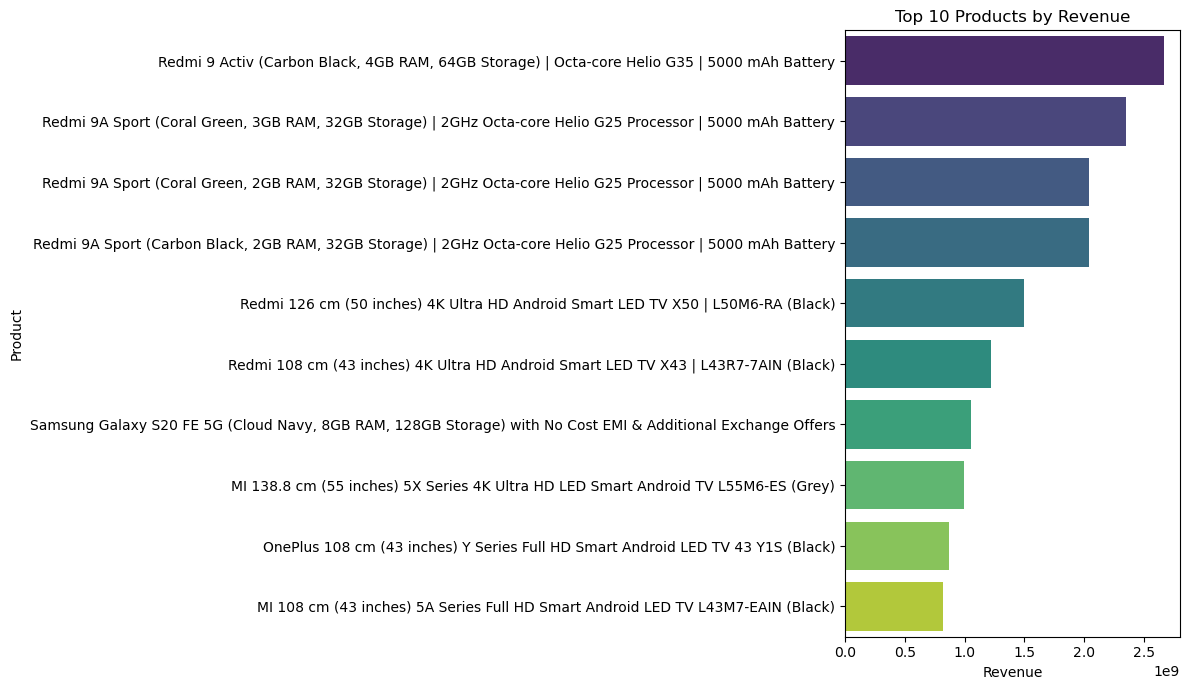

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\148185152.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE','NEUTRAL','NEGATIVE'])


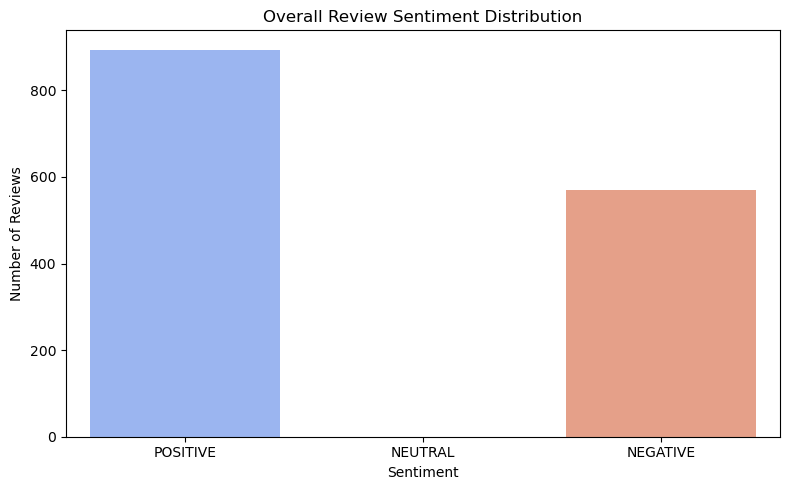

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\148185152.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\148185152.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


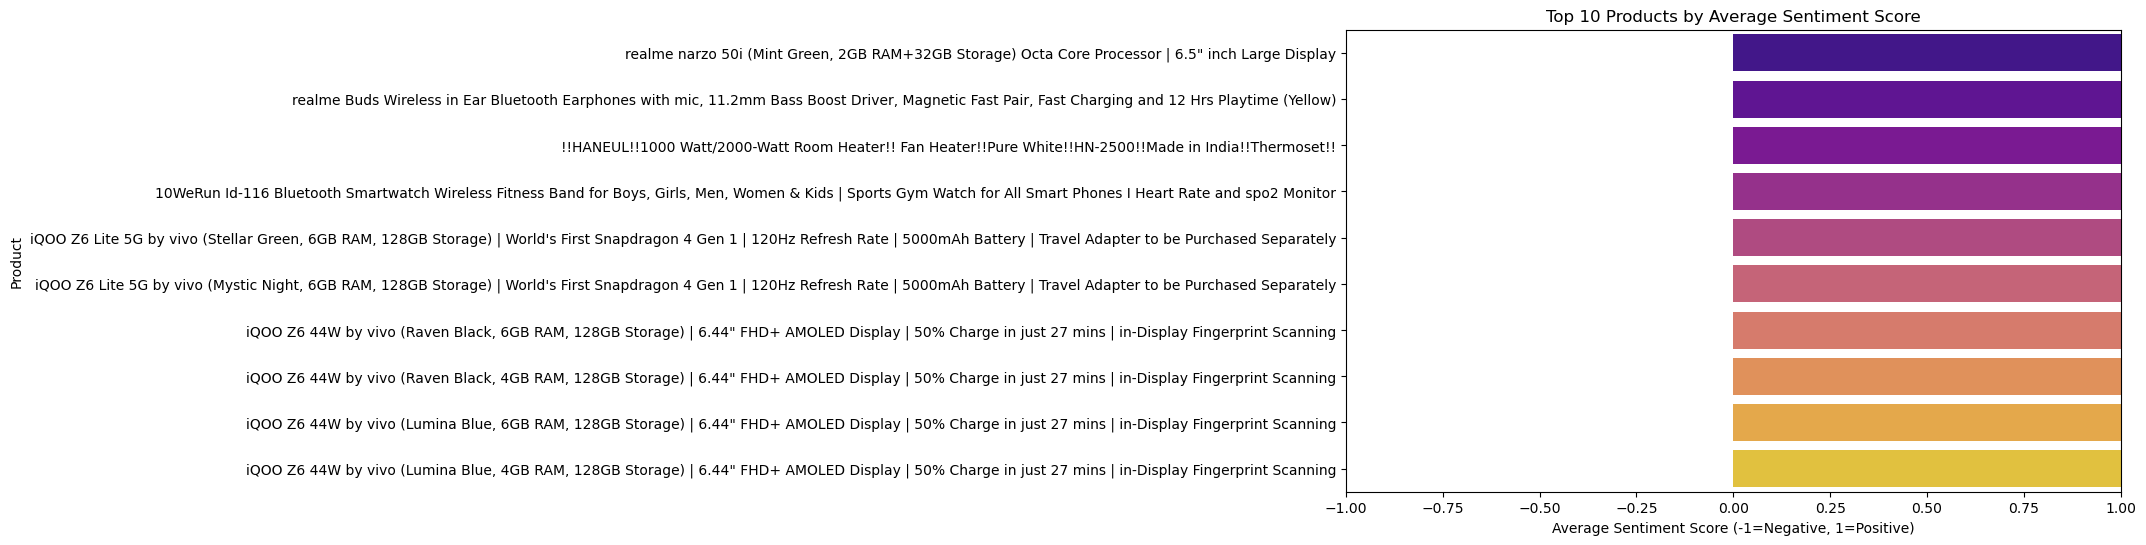

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\148185152.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')


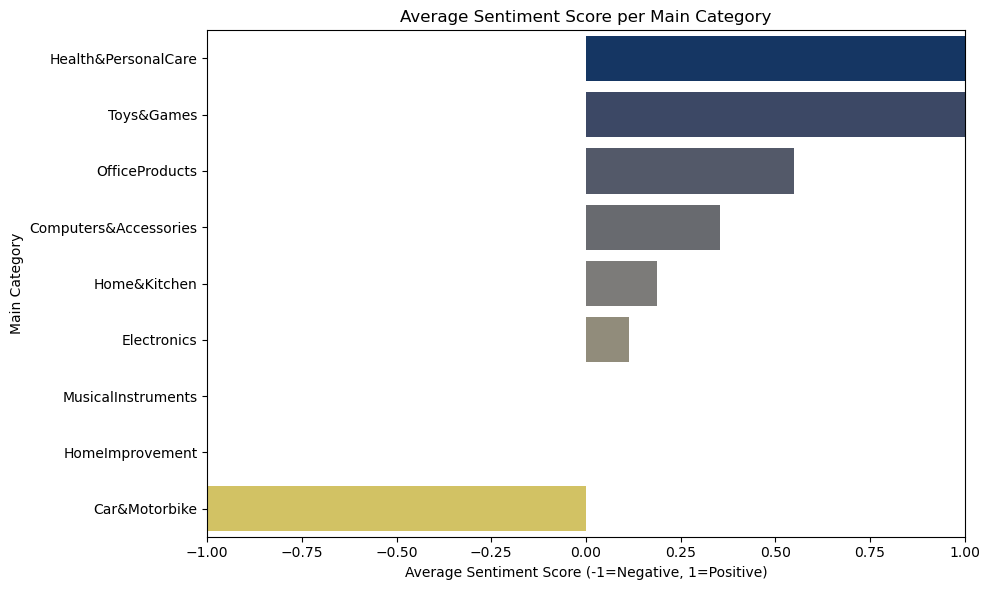

In [ ]:

# =========================================
#  Aggregate Sentiment by Product & Category
# =========================================

product_avg_sentiment = df.groupby('product_name')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Product (Top 10):\n", product_avg_sentiment.head(10))
print("\nAverage Sentiment Score per Product (Bottom 10):\n", product_avg_sentiment.tail(10))

category_avg_sentiment = df.groupby('main_category')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Main Category:\n", category_avg_sentiment)

product_sentiment_counts = df.groupby(['product_name', 'review_sentiment']).size().unstack(fill_value=0)
product_sentiment_counts['total_reviews'] = product_sentiment_counts.sum(axis=1)
product_sentiment_counts['positive_ratio'] = product_sentiment_counts['POSITIVE'] / product_sentiment_counts['total_reviews']
print("\nSentiment Counts and Positive Ratio per Product (Sample):\n", product_sentiment_counts.head())

# =========================================
#  Visualization
# =========================================

plt.figure(figsize=(12, 7))
sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE','NEUTRAL','NEGATIVE'])
plt.title("Overall Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
plt.title("Top 10 Products by Average Sentiment Score")
plt.xlabel("Average Sentiment Score (-1=Negative, 1=Positive)")
plt.ylabel("Product")
plt.xlim(-1,1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')
plt.title("Average Sentiment Score per Main Category")
plt.xlabel("Average Sentiment Score (-1=Negative, 1=Positive)")
plt.ylabel("Main Category")
plt.xlim(-1,1)
plt.tight_layout()
plt.show()

## delete all others code

## 5. Visualization

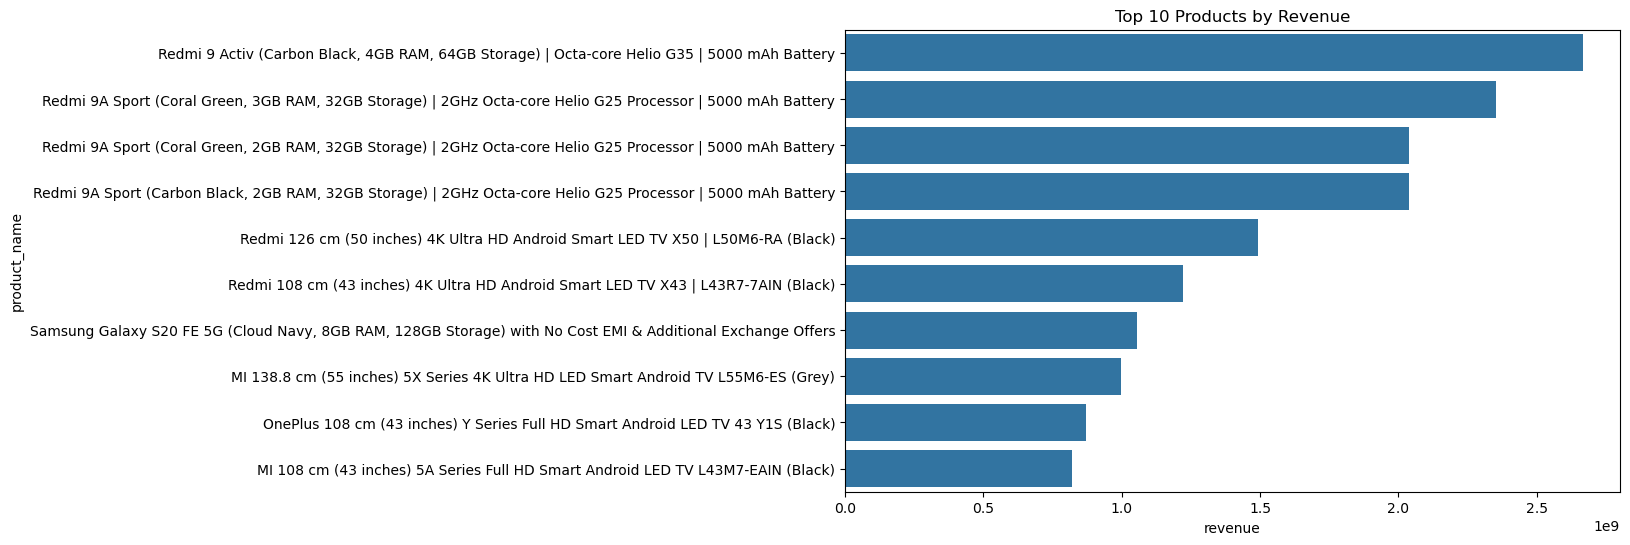

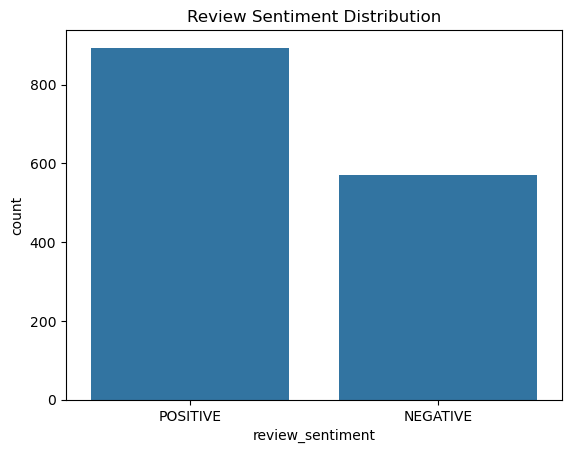

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 products by revenue
plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='product_name', data=top_sales)
plt.title("Top 10 Products by Revenue")
plt.show()

# Sentiment distribution
sns.countplot(x='review_sentiment', data=df)
plt.title("Review Sentiment Distribution")
plt.show()

Data Shape: (1465, 16)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  pro

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\138040614.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('UNKNOWN', inplace=True)
C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\138040614.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo


Sentiment Analysis Results (Sample):
                                                                                                                                                                                             review_content                                                                                                                                                                                           cleaned_review review_sentiment  sentiment_score  sentiment_numerical
0  Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original i...  looks durable charging is fine toono complainscharging is really fast good producttill now satisfied with the qualitythis is a good product  the charging speed is slower than the original iphone c...         POSITIVE         0.892279                    1
1  I ordered this cable to connect my phone

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\138040614.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')


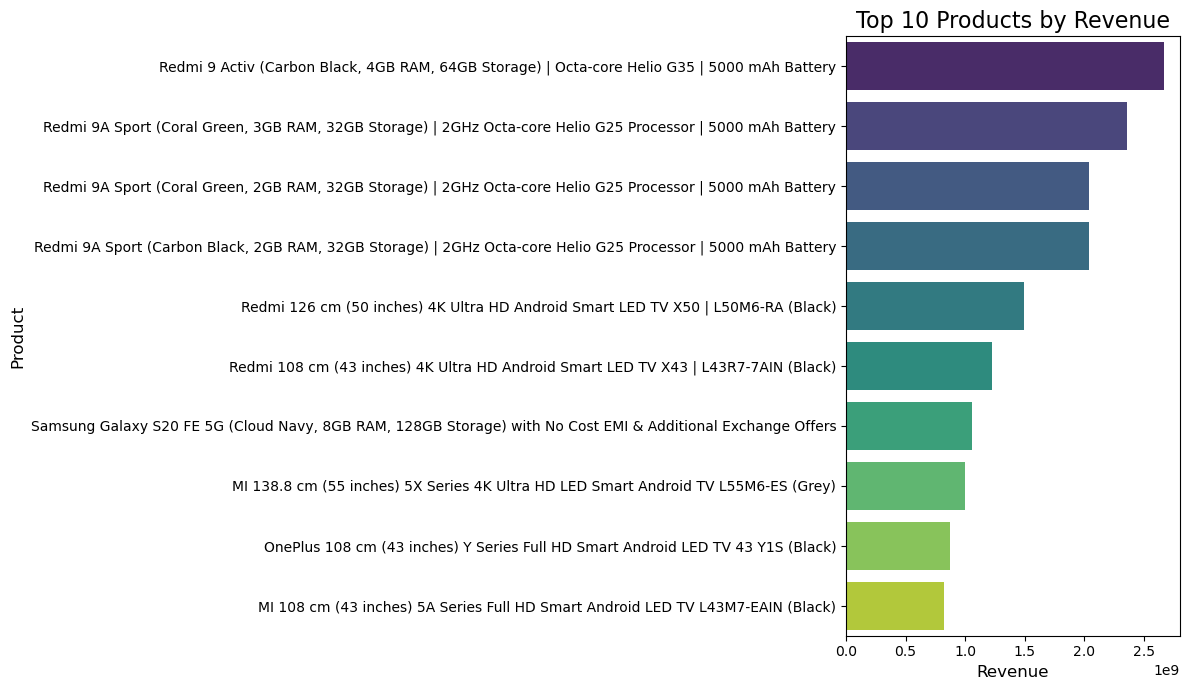

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\138040614.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])


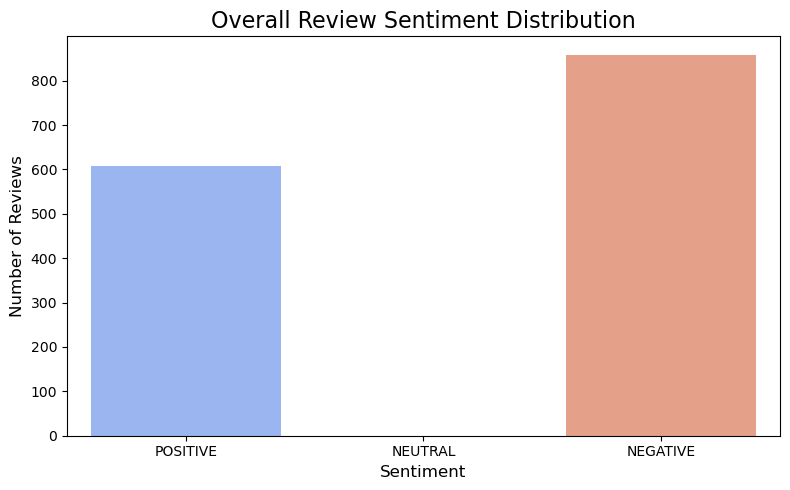

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\138040614.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\138040614.py:242: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


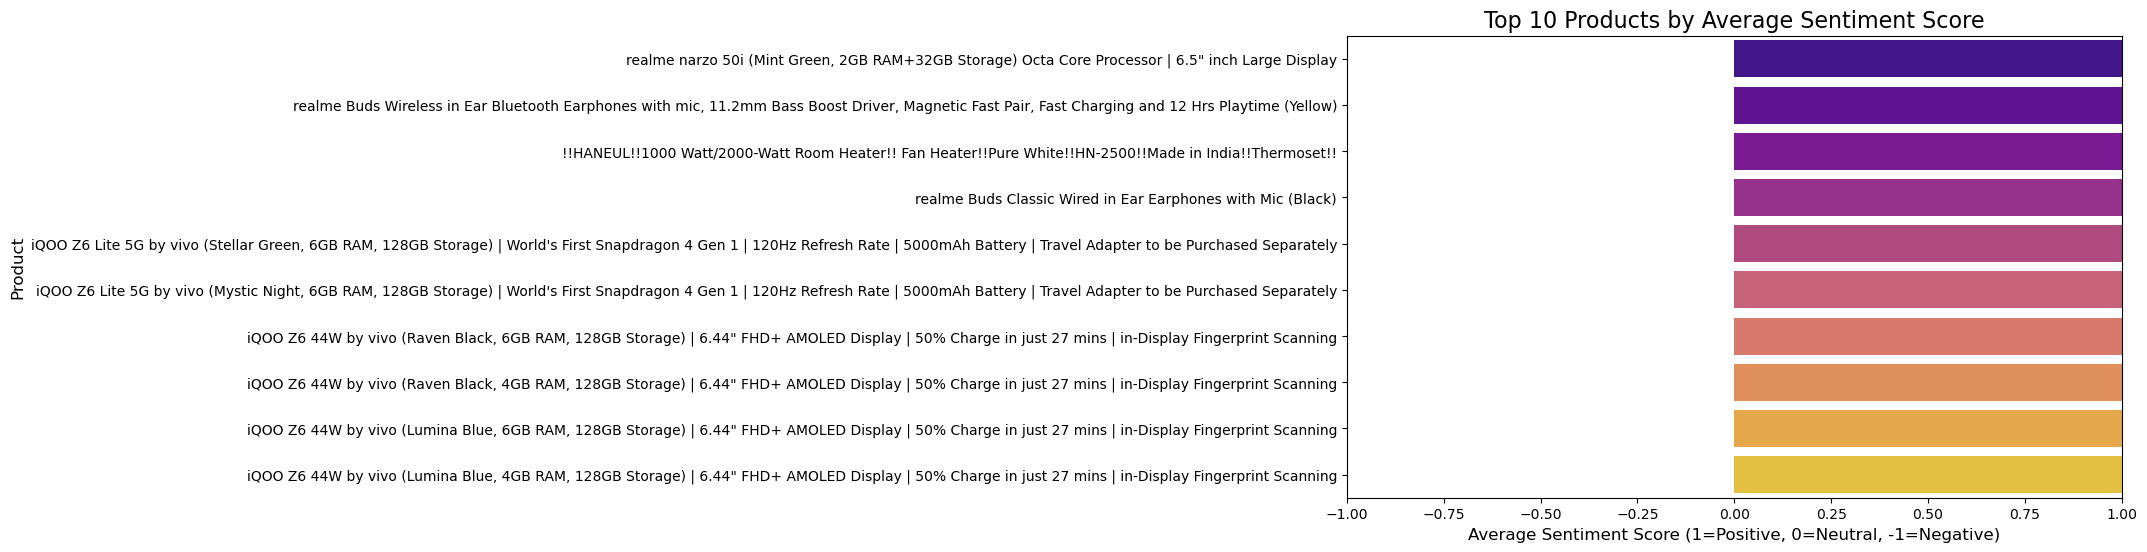

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\138040614.py:252: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')


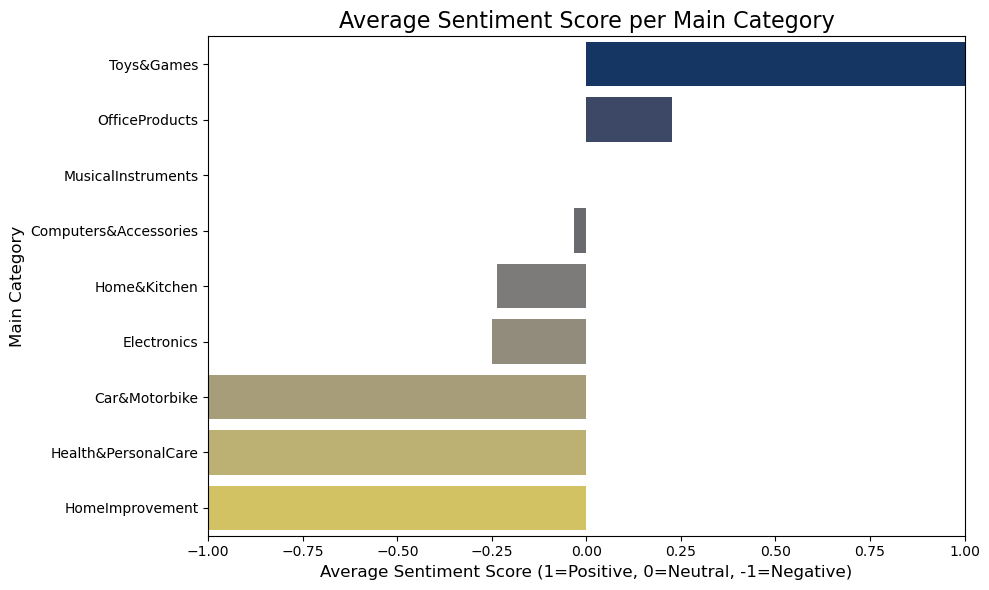


Processed data saved as processed_data_for_chatbot.csv

--- Chatbot Integration Benefits ---
The 'processed_data_for_chatbot.csv' now contains numerous features valuable for your chatbot:

1. Product Information:
   - product_name, category, main_category: Allows direct product lookup and categorization.
   - discounted_price, actual_price, discount_percentage, has_discount, discount_level: Enables price-related queries and discount alerts.
   - rating, rating_count, popularity: For recommending popular or highly-rated items.

2. Review and Sentiment Information:
   - review_content, cleaned_review: Original and pre-processed reviews for displaying detailed feedback.
   - review_sentiment, sentiment_score, sentiment_numerical: Core sentiment for understanding customer feelings.
   - review_length: Helps identify detailed reviews.
   - Aggregated sentiment per product/category: Allows chatbot to summarize sentiment, identify problematic products/categories, or highlight best-received o

In [5]:
# excel-analysis.ipynb

# =========================================
# 1. Setup
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import numpy as np # Added for numerical operations
import re # Added for text cleaning (regex)
from collections import Counter # Added for most common words

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # Ensure full display of wide dataframes
pd.set_option('display.max_colwidth', 200) # Show more of text content

# =========================================
# 2. Load Data
# =========================================
# Make sure "your_file.xlsx" is in the same directory or provide the full path.
try:
    df = pd.read_excel("data/amazon_product_reviews_cleaned.xlsx", engine='openpyxl')
except FileNotFoundError:
    print("Error: 'your_file.xlsx' not found. Please ensure the file is in the correct directory.")
    


print("Data Shape:", df.shape)
print("\nData Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# =========================================
# 3. Missing Values Check and Handling
# =========================================
print("\nMissing Values Before Handling:\n", df.isnull().sum())

# Strategy for Missing Values:
# For 'review_content', 'product_name', 'category': Fill with 'UNKNOWN' or empty string
#    - Why: These are categorical/text fields. Empty strings or 'UNKNOWN' allow sentiment analysis to still run
#           (though it might label 'UNKNOWN' as neutral) and prevents errors in string operations.
# For numerical columns like 'rating', 'rating_count', 'discount_percentage', etc.:
#    - If 'rating' or 'rating_count' are missing, it implies no reviews, so 0 is appropriate.
#    - If 'discount_percentage' is missing, it likely means no discount, so 0.
#    - Other numerical features might be filled with median/mean or dropped if a large percentage is missing.
#      For this dataset, we'll assume 0 for ratings/discounts if missing.

for col in ['review_content', 'product_name', 'category']:
    df[col].fillna('UNKNOWN', inplace=True)

for col in ['rating', 'rating_count', 'discount_percentage', 'discounted_price', 'actual_price']:
    df[col].fillna(0, inplace=True) # Assuming 0 for missing numerical values where it makes sense

print("\nMissing Values After Handling:\n", df.isnull().sum())

# =========================================
# 4. Exploratory Data Analysis (EDA)
# =========================================

# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df[['discounted_price', 'actual_price', 'discount_percentage',
          'rating', 'rating_count']].describe())

# Add revenue column
# Why: Revenue is a key business metric. It directly reflects sales performance.
df['revenue'] = df['discounted_price'] * df['rating_count']

# Top 10 products by revenue
top_sales = df.sort_values(by='revenue', ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n",
      top_sales[['product_name','category','revenue','rating','rating_count']])

# Products per category
category_counts = df['category'].value_counts()
print("\nTop Categories (Raw):\n", category_counts.head(10))

# Handle multi-level categories
# Why: Often, product categories are nested (e.g., "Electronics > Mobiles > Smartphones").
#      Extracting the main category helps in broader analysis and understanding product segments.
df['main_category'] = df['category'].apply(lambda x: str(x).split("|")[0].strip())
print("\nTop Main Categories:\n", df['main_category'].value_counts().head(10))

# =========================================
# 5. Feature Engineering
# =========================================
# Benefits for Chatbot: These features provide numerical representations of product attributes
# that a chatbot can use to filter, recommend, or answer specific queries without deep text processing
# every time. They enrich the product catalog.

df['has_discount'] = df['discount_percentage'] > 0
# Why: A simple boolean flag. Chatbots can use this to quickly answer "Are there any discounted items?"

df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))
# Why: Longer reviews might indicate more detailed feedback, either positive or negative.
#      A chatbot could prioritize showing reviews with a certain length for more context.

df['popularity'] = df['rating'] * df['rating_count']
# Why: Combines both quality (rating) and quantity of feedback (rating_count) into a single metric.
#      A product with a 5.0 rating from 1 review is less popular than a 4.5 rating from 1000 reviews.
#      Useful for "Show me popular products."

df['price_tier'] = pd.qcut(df['discounted_price'], q=4, labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'], duplicates='drop')
# Why: Categorizes products into price segments. Chatbots can answer "Show me budget laptops" or "What's in the luxury category?".
#      qcut ensures an even distribution across tiers.

df['discount_level'] = pd.cut(df['discount_percentage'], bins=[-1, 10, 25, 50, 100],
                              labels=['No/Low Discount', 'Moderate Discount', 'High Discount', 'Very High Discount'],
                              right=False, include_lowest=True)
# Why: Similar to price tier, but for discounts. Chatbots can answer "Show me products with high discounts."
#      Right=False and include_lowest=True handle the bins correctly for 0% discount.

# Text-based Feature Engineering (for review_content)
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove punctuation and special characters
    return text

df['cleaned_review'] = df['review_content'].apply(clean_text)
# Why: Essential preprocessing for text analysis. Removes noise, standardizes text.

# Extract keywords/n-grams (simple example)
# For a more robust approach, you'd use TF-IDF or embedding.
def extract_top_words(text_series, num_words=50):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return [word for word, count in word_counts.most_common(num_words)]

# This is a general list for the entire dataset. For product-specific keywords,
# you'd group by product and apply this function.
common_words = extract_top_words(df['cleaned_review'])
print(f"\nTop 50 most common words in reviews: {common_words}")
# Why: Can help identify overarching themes. For a chatbot, this can guide
#      responses or suggest common queries ("What about 'quality'?", "Is 'fast delivery' common?").

print("\nFeatures after Engineering (Sample):\n",
      df[['product_name','has_discount','review_length','popularity','price_tier','discount_level']].head())

# =========================================
# 6. Sentiment Analysis (Hugging Face)
# =========================================
# Why: Crucial for understanding customer perception. A chatbot can use this to:
#      - Answer "What's the general sentiment for Product X?"
#      - Filter reviews: "Show me positive reviews for Product Y."
#      - Escalate negative feedback to customer service.
#      - Identify pain points across products.

print("\nInitializing Sentiment Analysis Model...")
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
# Why: Explicitly specifying a well-known model (like distilbert-base-uncased-finetuned-sst-2-english)
#      can ensure consistent results and good performance. The default might vary or be less optimized.

# Apply sentiment to 'cleaned_review'
# Truncate text to 512 tokens as models often have a max input length.
# If a review is empty or just whitespace, label as NEUTRAL with 0 score.
df['review_sentiment'] = df['cleaned_review'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label'] if x.strip() else "NEUTRAL"
)
df['sentiment_score'] = df['cleaned_review'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['score'] if x.strip() else 0.0
)

# Map sentiment labels to a numerical scale for easier aggregation/analysis
sentiment_mapping = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
df['sentiment_numerical'] = df['review_sentiment'].map(sentiment_mapping)
# Why: Converts categorical sentiment to a numerical value, allowing for mean calculations
#      and more advanced statistical analysis across products or categories.

print("\nSentiment Analysis Results (Sample):\n",
      df[['review_content','cleaned_review','review_sentiment','sentiment_score','sentiment_numerical']].head(10))

# Sentiment distribution
print("\nSentiment Counts:\n", df['review_sentiment'].value_counts())

# =========================================
# 7. Aggregate Sentiment by Product & Category
# =========================================
# Why: Provides summarized sentiment insights at different levels, which is highly valuable for a chatbot.

# Average sentiment score per product
product_avg_sentiment = df.groupby('product_name')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Product (Top 10):\n", product_avg_sentiment.head(10))
print("\nAverage Sentiment Score per Product (Bottom 10):\n", product_avg_sentiment.tail(10))

# Average sentiment score per main category
category_avg_sentiment = df.groupby('main_category')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Main Category:\n", category_avg_sentiment)

# Count of positive, neutral, negative reviews per product
product_sentiment_counts = df.groupby(['product_name', 'review_sentiment']).size().unstack(fill_value=0)
product_sentiment_counts['total_reviews'] = product_sentiment_counts.sum(axis=1)
product_sentiment_counts['positive_ratio'] = product_sentiment_counts['POSITIVE'] / product_sentiment_counts['total_reviews']
print("\nSentiment Counts and Positive Ratio per Product (Sample):\n", product_sentiment_counts.head())

# =========================================
# 8. Visualization
# =========================================
# Why: Visualizations help in quickly grasping trends and communicating insights.
#      While a chatbot doesn't display these, the insights derived from them are critical.

plt.figure(figsize=(12, 7))
sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing top revenue products.
# 
# A bar chart showing the top 10 products by revenue. Each bar represents a product, and its length corresponds to the revenue generated.
# The x-axis is 'Revenue' and the y-axis is 'Product Name'. The chart has a title "Top 10 Products by Revenue".
# 

plt.figure(figsize=(8, 5))
sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
plt.title("Overall Review Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing overall sentiment distribution.
# 
# A count plot displaying the distribution of review sentiments (POSITIVE, NEUTRAL, NEGATIVE).
# The x-axis is 'Sentiment' and the y-axis is 'Number of Reviews'. The chart has a title "Overall Review Sentiment Distribution".
# 

plt.figure(figsize=(10, 6))
sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
plt.title("Top 10 Products by Average Sentiment Score", fontsize=16)
plt.xlabel("Average Sentiment Score (1=Positive, 0=Neutral, -1=Negative)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.xlim(-1, 1) # Set limits to sentiment score range
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing top products by average sentiment.
# 
# A horizontal bar chart showing the top 10 products based on their average sentiment score.
# The x-axis represents the 'Average Sentiment Score' (ranging from -1 for Negative to 1 for Positive), and the y-axis lists the 'Product' names.
# The title of the chart is "Top 10 Products by Average Sentiment Score".
# 

plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')
plt.title("Average Sentiment Score per Main Category", fontsize=16)
plt.xlabel("Average Sentiment Score (1=Positive, 0=Neutral, -1=Negative)", fontsize=12)
plt.ylabel("Main Category", fontsize=12)
plt.xlim(-1, 1) # Set limits to sentiment score range
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing average sentiment per main category.
# 
# A horizontal bar chart illustrating the average sentiment score for each main product category.
# The x-axis indicates the 'Average Sentiment Score' (from -1 to 1), and the y-axis shows the 'Main Category' names.
# The chart is titled "Average Sentiment Score per Main Category".
# 

# =========================================
# 9. Save Processed Data for Chatbot
# =========================================
# Why: Saves the enriched dataset. The chatbot or an application consuming the chatbot's output
#      can easily load this pre-processed data, rather than re-running all the analysis.
df.to_csv("processed_data_for_chatbot.csv", index=False)
print("\nProcessed data saved as processed_data_for_chatbot.csv")

# =========================================
# 10. Prepare Data for Chatbot Integration (Conceptual)
# =========================================
# This section outlines how the processed features benefit a chatbot.

print("\n--- Chatbot Integration Benefits ---")
print("The 'processed_data_for_chatbot.csv' now contains numerous features valuable for your chatbot:")

print("\n1. Product Information:")
print("   - product_name, category, main_category: Allows direct product lookup and categorization.")
print("   - discounted_price, actual_price, discount_percentage, has_discount, discount_level: Enables price-related queries and discount alerts.")
print("   - rating, rating_count, popularity: For recommending popular or highly-rated items.")

print("\n2. Review and Sentiment Information:")
print("   - review_content, cleaned_review: Original and pre-processed reviews for displaying detailed feedback.")
print("   - review_sentiment, sentiment_score, sentiment_numerical: Core sentiment for understanding customer feelings.")
print("   - review_length: Helps identify detailed reviews.")
print("   - Aggregated sentiment per product/category: Allows chatbot to summarize sentiment, identify problematic products/categories, or highlight best-received ones.")

print("\n3. Additional Features:")
print("   - revenue: For identifying top-selling products.")
print("   - price_tier: To filter products by budget ('Show me mid-range laptops').")

print("\nChatbot Use Cases:")
print(" - 'What are your most popular products?' (uses 'popularity' and 'rating')")
print(" - 'Show me laptops with high discounts.' (uses 'main_category', 'discount_level')")
print(" - 'Tell me about the sentiment for Product A.' (uses 'product_name', 'review_sentiment', 'sentiment_numerical')")
print(" - 'Are there any negative reviews for Product B?' (filters by 'product_name' and 'review_sentiment' = 'NEGATIVE')")
print(" - 'Which categories have the best customer satisfaction?' (uses aggregated 'category_avg_sentiment')")
print(" - 'Recommend a budget-friendly mobile.' (uses 'price_tier' and 'main_category')")

# Example of a chatbot lookup:
# def get_product_info_for_chatbot(df, product_name):
#     product = df[df['product_name'] == product_name].iloc[0]
#     return {
#         'name': product['product_name'],
#         'category': product['main_category'],
#         'price': product['discounted_price'],
#         'rating': product['rating'],
#         'popularity': product['popularity'],
#         'avg_sentiment': df[df['product_name'] == product_name]['sentiment_numerical'].mean(),
#         'sentiment_counts': df[df['product_name'] == product_name]['review_sentiment'].value_counts().to_dict()
#     }
#
# if 'Product A' in df['product_name'].values:
#     product_a_info = get_product_info_for_chatbot(df, 'Product A')
#     print(f"\nChatbot Info for Product A: {product_a_info}")


In [ ]:
# excel-analysis.ipynb

# =========================================
# 4. Exploratory Data Analysis (EDA)
# =========================================

# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df[['discounted_price', 'actual_price', 'discount_percentage',
          'rating', 'rating_count']].describe())

# Add revenue column
df['revenue'] = df['discounted_price'] * df['rating_count']

# Top 10 products by revenue
top_sales = df.sort_values(by='revenue', ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n",
      top_sales[['product_name','category','revenue','rating','rating_count']])

# Products per category
category_counts = df['category'].value_counts()
print("\nTop Categories (Raw):\n", category_counts.head(10))

# Extract main category (first level before "|")
df['main_category'] = df['category'].apply(lambda x: str(x).split("|")[0].strip())
print("\nTop Main Categories:\n", df['main_category'].value_counts().head(10))

# =========================================
# 5. Feature Engineering
# =========================================

df['has_discount'] = df['discount_percentage'] > 0
df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))
df['popularity'] = df['rating'] * df['rating_count']

# Price tier categories
df['price_tier'] = pd.qcut(
    df['discounted_price'], 
    q=4, 
    labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'], 
    duplicates='drop'
)

# Discount levels
df['discount_level'] = pd.cut(
    df['discount_percentage'], 
    bins=[-1, 10, 25, 50, 100],
    labels=['No/Low Discount', 'Moderate Discount', 'High Discount', 'Very High Discount'],
    right=False, include_lowest=True
)

print("\nFeatures after Engineering (Sample):\n",
      df[['product_name','has_discount','review_length','popularity','price_tier','discount_level']].head())

# =========================================
# 6. Sentiment Analysis (Hugging Face)
# =========================================

print("\nInitializing Sentiment Analysis Model...")
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Apply sentiment on already-cleaned text (from earlier cleaning step)
df['review_sentiment'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label'] if x.strip() else "NEUTRAL"
)
df['sentiment_score'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['score'] if x.strip() else 0.0
)

# Map sentiment labels to numeric scale
sentiment_mapping = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
df['sentiment_numerical'] = df['review_sentiment'].map(sentiment_mapping)

print("\nSentiment Analysis Results (Sample):\n",
      df[['review_content','review_sentiment','sentiment_score','sentiment_numerical']].head(10))

print("\nSentiment Counts:\n", df['review_sentiment'].value_counts())

# =========================================
# 7. Aggregate Sentiment by Product & Category
# =========================================

product_avg_sentiment = df.groupby('product_name')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Product (Top 10):\n", product_avg_sentiment.head(10))
print("\nAverage Sentiment Score per Product (Bottom 10):\n", product_avg_sentiment.tail(10))

category_avg_sentiment = df.groupby('main_category')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Main Category:\n", category_avg_sentiment)

product_sentiment_counts = df.groupby(['product_name', 'review_sentiment']).size().unstack(fill_value=0)
product_sentiment_counts['total_reviews'] = product_sentiment_counts.sum(axis=1)
product_sentiment_counts['positive_ratio'] = product_sentiment_counts['POSITIVE'] / product_sentiment_counts['total_reviews']
print("\nSentiment Counts and Positive Ratio per Product (Sample):\n", product_sentiment_counts.head())

# =========================================
# 8. Visualization
# =========================================

plt.figure(figsize=(12, 7))
sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE','NEUTRAL','NEGATIVE'])
plt.title("Overall Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
plt.title("Top 10 Products by Average Sentiment Score")
plt.xlabel("Average Sentiment Score (-1=Negative, 1=Positive)")
plt.ylabel("Product")
plt.xlim(-1,1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')
plt.title("Average Sentiment Score per Main Category")
plt.xlabel("Average Sentiment Score (-1=Negative, 1=Positive)")
plt.ylabel("Main Category")
plt.xlim(-1,1)
plt.tight_layout()
plt.show()

# =========================================
# 9. Save Processed Data for Chatbot
# =========================================
df.to_csv("processed_data_for_chatbot.csv", index=False)
print("\nProcessed data saved as processed_data_for_chatbot.csv")


In [ ]:
# excel-analysis.ipynb

# =========================================
# 4. Exploratory Data Analysis (EDA)
# =========================================

# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df[['discounted_price', 'actual_price', 'discount_percentage',
          'rating', 'rating_count']].describe())

# Add revenue column
df['revenue'] = df['discounted_price'] * df['rating_count']

# Top 10 products by revenue
top_sales = df.sort_values(by='revenue', ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n",
      top_sales[['product_name','category','revenue','rating','rating_count']])

# Products per category
category_counts = df['category'].value_counts()
print("\nTop Categories (Raw):\n", category_counts.head(10))

# Extract main category (first level before "|")
df['main_category'] = df['category'].apply(lambda x: str(x).split("|")[0].strip())
print("\nTop Main Categories:\n", df['main_category'].value_counts().head(10))

# =========================================
# 5. Feature Engineering
# =========================================

df['has_discount'] = df['discount_percentage'] > 0
df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))
df['popularity'] = df['rating'] * df['rating_count']

# Price tier categories
df['price_tier'] = pd.qcut(
    df['discounted_price'], 
    q=4, 
    labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'], 
    duplicates='drop'
)

# Discount levels
df['discount_level'] = pd.cut(
    df['discount_percentage'], 
    bins=[-1, 10, 25, 50, 100],
    labels=['No/Low Discount', 'Moderate Discount', 'High Discount', 'Very High Discount'],
    right=False, include_lowest=True
)

print("\nFeatures after Engineering (Sample):\n",
      df[['product_name','has_discount','review_length','popularity','price_tier','discount_level']].head())

# =========================================
# 6. Sentiment Analysis (Hugging Face)
# =========================================

print("\nInitializing Sentiment Analysis Model...")
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Apply sentiment on already-cleaned text (from earlier cleaning step)
df['review_sentiment'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label'] if x.strip() else "NEUTRAL"
)
df['sentiment_score'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['score'] if x.strip() else 0.0
)

# Map sentiment labels to numeric scale
sentiment_mapping = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
df['sentiment_numerical'] = df['review_sentiment'].map(sentiment_mapping)

print("\nSentiment Analysis Results (Sample):\n",
      df[['review_content','review_sentiment','sentiment_score','sentiment_numerical']].head(10))

print("\nSentiment Counts:\n", df['review_sentiment'].value_counts())

# =========================================
# 7. Aggregate Sentiment by Product & Category
# =========================================

product_avg_sentiment = df.groupby('product_name')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Product (Top 10):\n", product_avg_sentiment.head(10))
print("\nAverage Sentiment Score per Product (Bottom 10):\n", product_avg_sentiment.tail(10))

category_avg_sentiment = df.groupby('main_category')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Main Category:\n", category_avg_sentiment)

product_sentiment_counts = df.groupby(['product_name', 'review_sentiment']).size().unstack(fill_value=0)
product_sentiment_counts['total_reviews'] = product_sentiment_counts.sum(axis=1)
product_sentiment_counts['positive_ratio'] = product_sentiment_counts['POSITIVE'] / product_sentiment_counts['total_reviews']
print("\nSentiment Counts and Positive Ratio per Product (Sample):\n", product_sentiment_counts.head())

# =========================================
# 8. Visualization
# =========================================

plt.figure(figsize=(12, 7))
sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE','NEUTRAL','NEGATIVE'])
plt.title("Overall Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
plt.title("Top 10 Products by Average Sentiment Score")
plt.xlabel("Average Sentiment Score (-1=Negative, 1=Positive)")
plt.ylabel("Product")
plt.xlim(-1,1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')
plt.title("Average Sentiment Score per Main Category")
plt.xlabel("Average Sentiment Score (-1=Negative, 1=Positive)")
plt.ylabel("Main Category")
plt.xlim(-1,1)
plt.tight_layout()
plt.show()

# =========================================
# 9. Save Processed Data for Chatbot
# =========================================
df.to_csv("processed_data_for_chatbot.csv", index=False)
print("\nProcessed data saved as processed_data_for_chatbot.csv")


In [19]:
# excel-analysis.ipynb

# =========================================
# 1. Setup
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import numpy as np
import re
from collections import Counter

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

# =========================================
# 2. Load Data
# =========================================
try:
    df = pd.read_excel("data/amazon_product_reviews.xlsx", engine='openpyxl')
except FileNotFoundError:
    print("Error: File not found. Please ensure the file is in the correct directory.")

print("Data Shape:", df.shape)
print("\nData Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# =========================================
# 3. Clean Only Numeric-Like Columns
# =========================================
numeric_like_cols = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in numeric_like_cols:
    if col in df.columns:
        # Remove non-digit characters (keep dot)
        df[col] = df[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
        # Convert to float; invalids become NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# =========================================
# 4. Handle Missing Values
# =========================================
for col in ['review_content', 'product_name', 'category']:
    df[col].fillna('UNKNOWN', inplace=True)

for col in numeric_like_cols:
    df[col].fillna(0, inplace=True)

print("\nMissing Values After Handling:\n", df.isnull().sum())

# =========================================
# 5. Feature Engineering
# =========================================
df['revenue'] = df['discounted_price'] * df['rating_count']
df['main_category'] = df['category'].apply(lambda x: str(x).split("|")[0].strip())
df['has_discount'] = df['discount_percentage'] > 0
df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))
df['popularity'] = df['rating'] * df['rating_count']

df['price_tier'] = pd.qcut(df['discounted_price'], q=4,
                           labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'],
                           duplicates='drop')

df['discount_level'] = pd.cut(df['discount_percentage'],
                              bins=[-1, 10, 25, 50, 100],
                              labels=['No/Low Discount', 'Moderate Discount', 'High Discount', 'Very High Discount'],
                              right=False, include_lowest=True)

# Keep review_content with emojis for sentiment
def clean_text_basic(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # stripped version for analysis (no emojis)
    return text

df['cleaned_review'] = df['review_content'].apply(clean_text_basic)

# =========================================
# 6. Sentiment Analysis
# =========================================
print("\nInitializing Sentiment Analysis Model...")
sentiment_model = pipeline("sentiment-analysis",
                           model="distilbert-base-uncased-finetuned-sst-2-english")

df['review_sentiment'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label'] if x.strip() else "NEUTRAL"
)
df['sentiment_score'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['score'] if x.strip() else 0.0
)

sentiment_mapping = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
df['sentiment_numerical'] = df['review_sentiment'].map(sentiment_mapping)

print("\nSentiment Analysis Results (Sample):\n",
      df[['review_content','review_sentiment','sentiment_score','sentiment_numerical']].head(10))

# =========================================
# 7. Save Processed Data
# =========================================
df.to_excel("data/amazon_product_reviews_processed.xlsx", index=False, engine='openpyxl')
df.to_csv("processed_data_for_chatbot.csv", index=False)
print("\nProcessed data saved as amazon_product_reviews_processed.xlsx and processed_data_for_chatbot.csv")


Data Shape: (1465, 16)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  pro

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\3020805254.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('UNKNOWN', inplace=True)
C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\3020805254.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.




Sentiment Analysis Results (Sample):
                                                                                                                                                                                             review_content review_sentiment  sentiment_score  sentiment_numerical
0  Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original i...         POSITIVE         0.984097                    1
1  I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's sti...         POSITIVE         0.999503                    1
2  Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71rIggrbUCL._SY88.jpg,Working good,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/